# Problem Statement 

Guests and hosts have used hospitality industries to expand on travelling possibilities
and present a more unique, personalised way of experiencing the world.
Data analysis on millions of listings provided through these industries are crucial for the company.
These millions of listings generate a lot of data , data that can be analysed and 
used for security, business decisions, understanding of customers and provider (hosts) behaviour
and performance on the platform, guiding marketing initiatives, implementation of
innovative additional services and much more.

Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?

* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

* This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

* The data contains 48895 rows and 16 columns.

* The data contains information about the id, host name, host_id, host_name, neighbourhood_group, neighbouhood, latitude, longitude, room type, price, minimum number of nights, number of reviews, last review, reviews per month, calculated host listings count, and availability during the year.


1. `id`: Unique ID of the Airbnb listing.

2. `name`: Name of the listed property.
3. `host_id`: Unique ID of the host.
4. `host_name`: Name of the host.
5. `neighbourhood_group`: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
6. `neighbourhood`: Specific neighborhood where the property is located.
7. `latitude`: Latitude coordinate of the property.
8. `longitude`: Longitude coordinate of the property.
9. `room_type`: Type of room (e.g., Private room, Shared room, Entire home/apt).
10. `price`: Price per night (in USD).
11. `minimum_nights`: Minimum number of nights guests are required to stay.
12. `number_of_reviews`: Number of reviews the listing has received.
13. `last_review`: Date of the last review.
14. `reviews_per_month`: Average number of reviews per month.
15. `calculated_host_listings_count`: Total number of properties listed by the host.
16. `availability_365`: Number of days the property is available in a year.

## Importing Libraries 


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

from xgboost import XGBRegressor
from catboost import CatBoostRegressor



## Loading the data `

In [2]:
df = pd.read_csv("hotel.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
len(df) , len(df.columns)

## as we can see we have 16 features and 48895 rows

(48895, 16)

### There are also features which are of no use 

In [6]:
# We dropped the variables that are not useful from the dataset.

drop_list = ['id', 'host_id', 'host_name', 'last_review']

In [7]:
df.drop(drop_list, axis = 1, inplace=True)

In [8]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [9]:
len(df.columns)

12

## Exploratory Data Analysis (EDA)

In [10]:
df.shape

(48895, 12)

In [11]:
df.dtypes

name                               object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
df.tail()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2
48894,Trendy duplex in the very heart of Hell's Kitchen,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,1,23


In [13]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Price by Room Type


Text(0.5, 1.0, 'Room Type v/s Price')

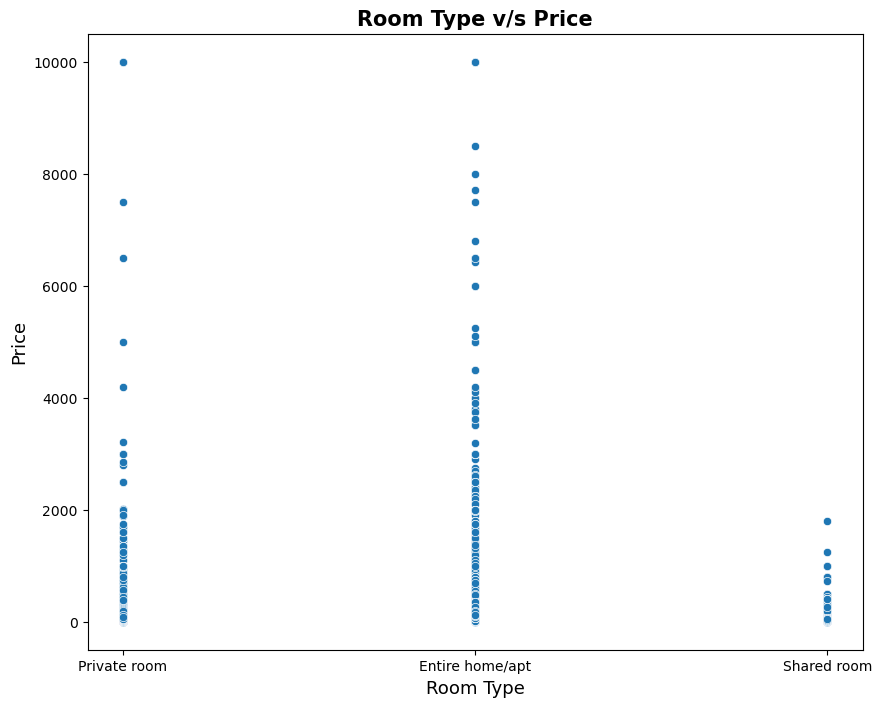

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='room_type', y='price', data = df)

plt.xlabel('Room Type', size=13)
plt.ylabel('Price', size = 13)
plt.title('Room Type v/s Price', size=15, weight='bold')

`Observation`: Shared room is always lower than 2,000 dollars. On the other hand,
    `Private Room ` and `Entire home/apartment` is normally higher than Shared room.

## Price by Neighbourhood Group 

mainly we have 5 neighbouring cities : Brooklyn, Manhattan, Queens, Staten Island and 
    Bronx

Text(0.5, 1.0, 'Neighbourhood Group v/s Price')

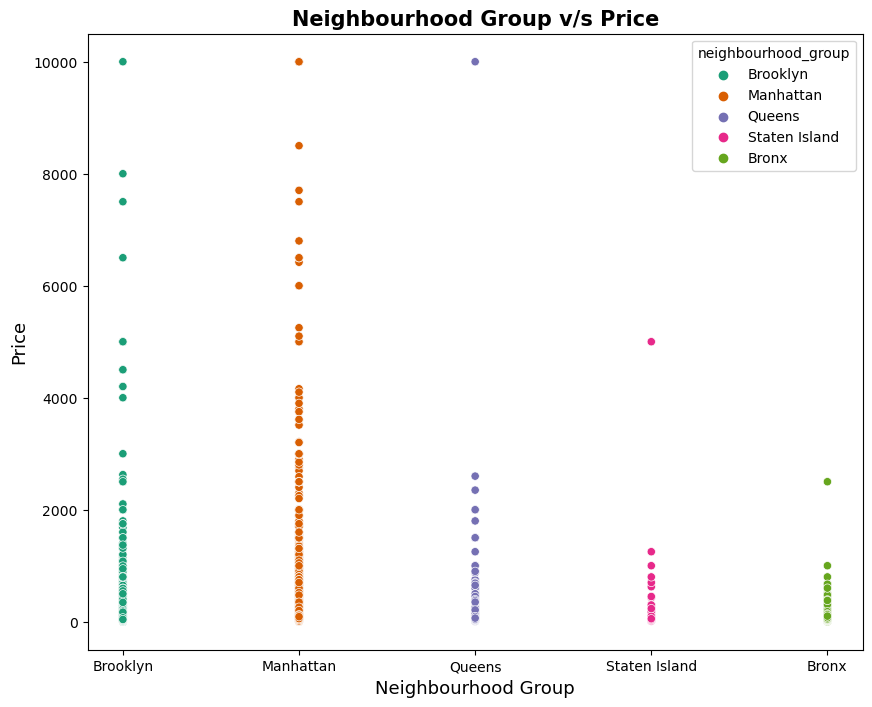

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='neighbourhood_group', y= 'price', data=df,
               hue='neighbourhood_group', palette='Dark2')

plt.xlabel('Neighbourhood Group', size=13)
plt.ylabel('Price', size=13)
plt.title('Neighbourhood Group v/s Price', size=15, weight='bold')

`Observation`: In average, the higher price of room is in `Manhattan` and `Brooklyn`. On the other hands, there are a lot of lower price rooms in `Queens`, `Staten Island`, and `Bronx`.

## Price by number of reviews 

Text(0.5, 1.0, 'Price vs Number of Reviews')

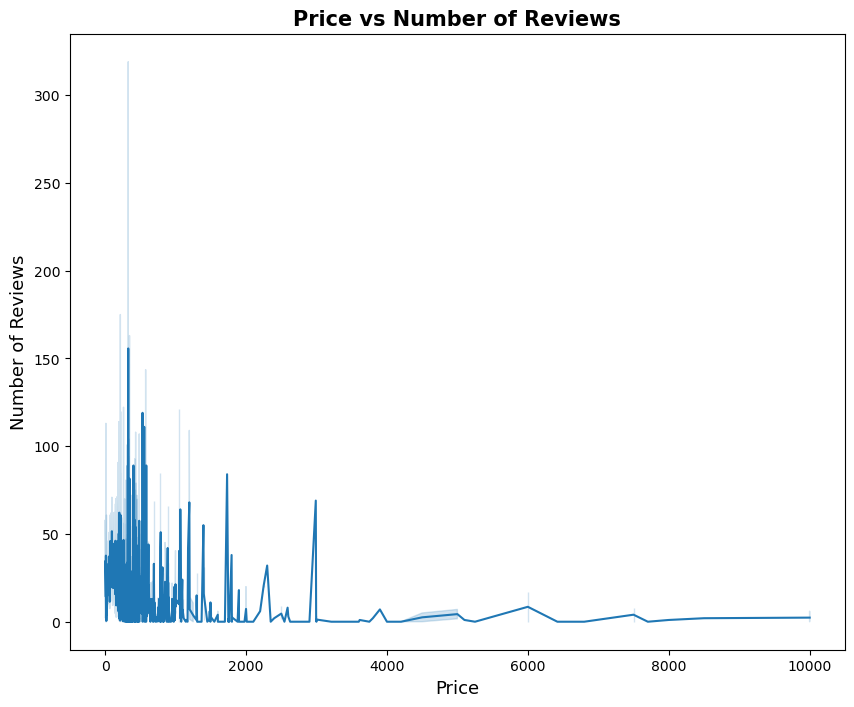

In [17]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='price', y='number_of_reviews' )

plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews",size=15, weight='bold')

### Observations:

* This line plot demonstrates that lower price listings have a higher number of reviews compared to the low number of reviews at higher price listings.

* To go into detail, higher price rooms are unlikely to be rented; therefore, having low to no reviews. The lower cost of the company plays a big role in terms of getting a number of reviews.df.describe()

In [18]:
price_query = df['price'].describe()
price_query

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

There are a total of 48896 Airbnb listings in the dataset. From those listings:

*  The mean price is $152.73



* There exists no cost rental Airbnb listings.
* The highest daily rental price is $10000. From the visualizations, these listings are stick out.




In [19]:
from scipy.stats import norm

C:\Users\devco\AppData\Local\Temp\ipykernel_12592\3091276988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], fit=norm)


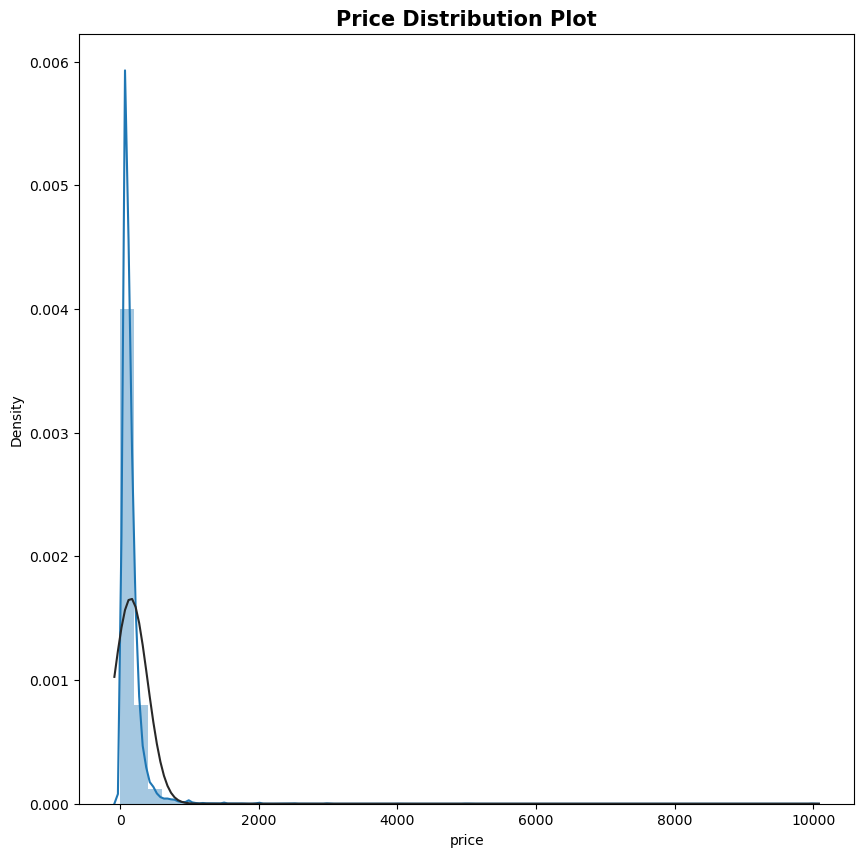

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold');

In [21]:
df['price_log'] = np.log(df.price+1)

C:\Users\devco\AppData\Local\Temp\ipykernel_12592\1751808362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_log'], fit=norm)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

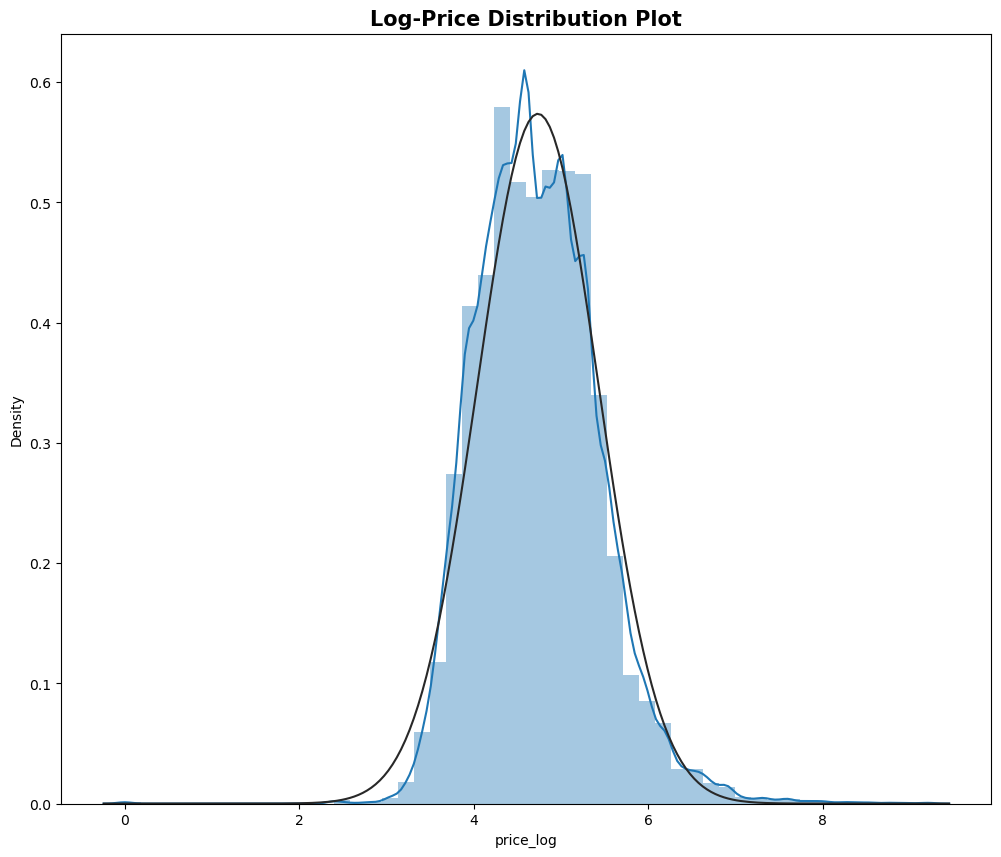

In [22]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')


## Correlation between different variables 

In [23]:
## Dropping string values
dff = df.copy()

In [24]:
dff.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.010635
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.420535
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,5.017280
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.499810
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.394449


In [25]:
dff.drop(['name'], axis = 1, inplace = True)

### Data Pre-Processing

In [26]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [27]:
dff.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

#### Replacing the missing data (NAN or null values) with the mean 

`number of reviews` feature has some missing data. for this feature, missing data 
will be replaced with mean. Since the data is more symmetric, mean replacement 
would be better.

In [28]:
print(np.mean(dff['reviews_per_month']))

1.3732214298586618


In [29]:
dff['reviews_per_month'].fillna(np.mean(dff['reviews_per_month']), inplace= True)
dff.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

`Observations:`

    
    

We have replaced 10052 listings that have no value in the 'reviews_per_month' attribute with the mean. That means that NaN --> 1.3732214298586618.




We do this to preserve the data volume. More data, the better..

In [30]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  price_log                       48895 non-null  float64
dtypes: float64(4), int64(5), object(

#### Observations:

3 features ('neighbourhood_group', neighbourhood', and 'room_type') are considered as object types, not nominal.

            
            
            
            
Machine learning algorithms prefer in a numerical format over string types

In [31]:
original_categories = dff['neighbourhood_group'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Original Value: Bronx | Code: 0
Original Value: Brooklyn | Code: 1
Original Value: Manhattan | Code: 2
Original Value: Queens | Code: 3
Original Value: Staten Island | Code: 4


In [32]:
original_categories = dff['neighbourhood'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Original Value: Allerton | Code: 0
Original Value: Arden Heights | Code: 1
Original Value: Arrochar | Code: 2
Original Value: Arverne | Code: 3
Original Value: Astoria | Code: 4
Original Value: Bath Beach | Code: 5
Original Value: Battery Park City | Code: 6
Original Value: Bay Ridge | Code: 7
Original Value: Bay Terrace | Code: 8
Original Value: Bay Terrace, Staten Island | Code: 9
Original Value: Baychester | Code: 10
Original Value: Bayside | Code: 11
Original Value: Bayswater | Code: 12
Original Value: Bedford-Stuyvesant | Code: 13
Original Value: Belle Harbor | Code: 14
Original Value: Bellerose | Code: 15
Original Value: Belmont | Code: 16
Original Value: Bensonhurst | Code: 17
Original Value: Bergen Beach | Code: 18
Original Value: Boerum Hill | Code: 19
Original Value: Borough Park | Code: 20
Original Value: Breezy Point | Code: 21
Original Value: Briarwood | Code: 22
Original Value: Brighton Beach | Code: 23
Original Value: Bronxdale | Code: 24
Original Value: Brooklyn Heights

In [33]:
original_categories = dff['room_type'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Original Value: Entire home/apt | Code: 0
Original Value: Private room | Code: 1
Original Value: Shared room | Code: 2


In [34]:
# Changing the non-numerical value using cat.code

dff['neighbourhood_group'] = dff['neighbourhood_group'].astype("category").cat.codes

dff['neighbourhood'] = dff['neighbourhood'].astype("category").cat.codes

dff['room_type'] = dff['room_type'].astype("category").cat.codes



In [35]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  price_log                       48895 non-null  float64
dtypes: float64(4), int16(1), int64(5

#### So we have successfully converted all the object/string type to numerical type 

## Detecting Numeric and Categorical Variables 

In [36]:
def col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat


In [37]:
cat_cols, num_cols, cat_but_car, num_but_cat = col_names(dff)

Observations: 48895
Variables: 12
cat_cols: 2
num_cols: 10
cat_but_car: 0
num_but_cat: 2


In [38]:
cat_cols

['neighbourhood_group', 'room_type']

In [39]:
num_cols

['neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'price_log']

In [40]:
cat_but_car

[]

In [41]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  price_log                       48895 non-null  float64
dtypes: float64(4), int16(1), int64(5

## Correlation Analysis

In [42]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (12, 12)})
        sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")  # annot=True added here
        plt.show()
    return drop_list

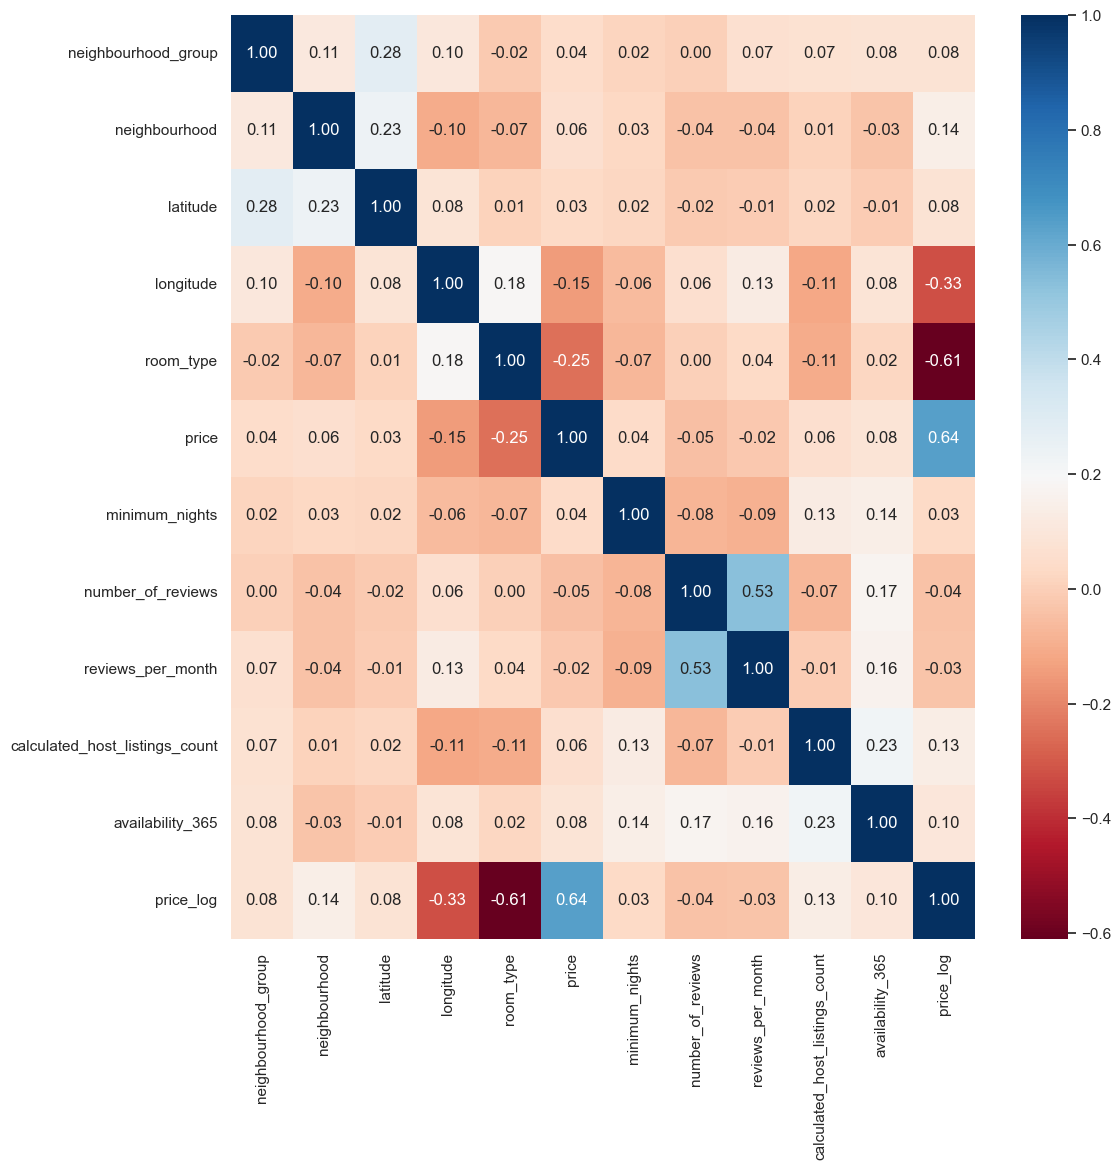

[]

In [43]:
high_correlated_cols(dff, plot=True)

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_log'],
      dtype='object')

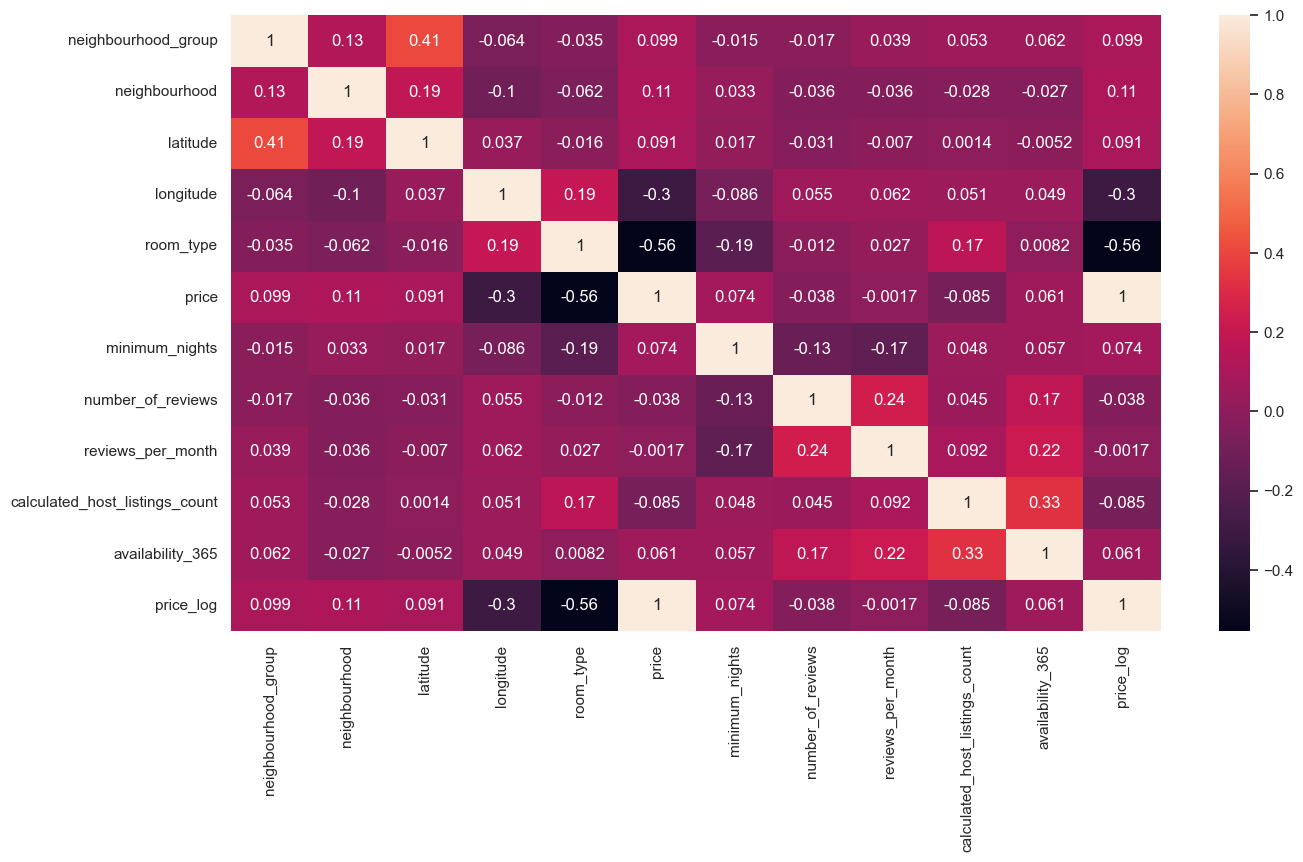

In [44]:
corr = dff.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dff.columns

## Visualizing Location Data Based on Neighbourhood Group and Room Type  

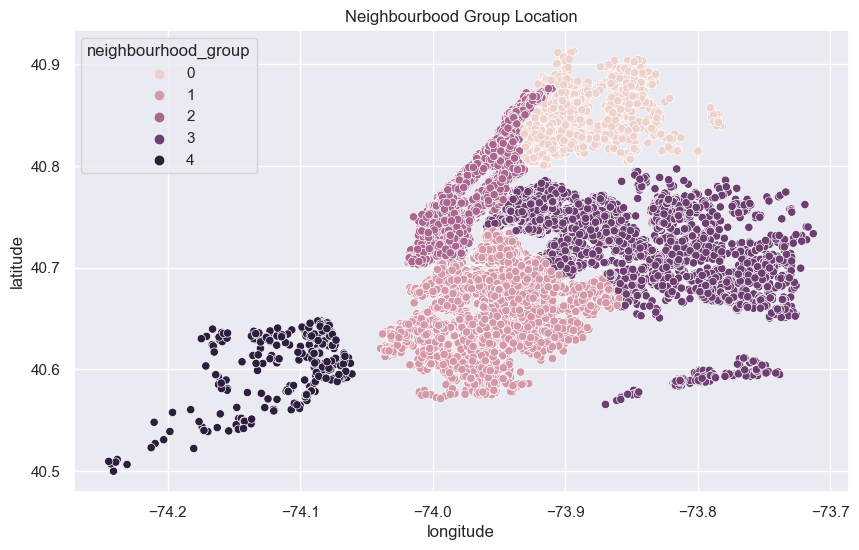

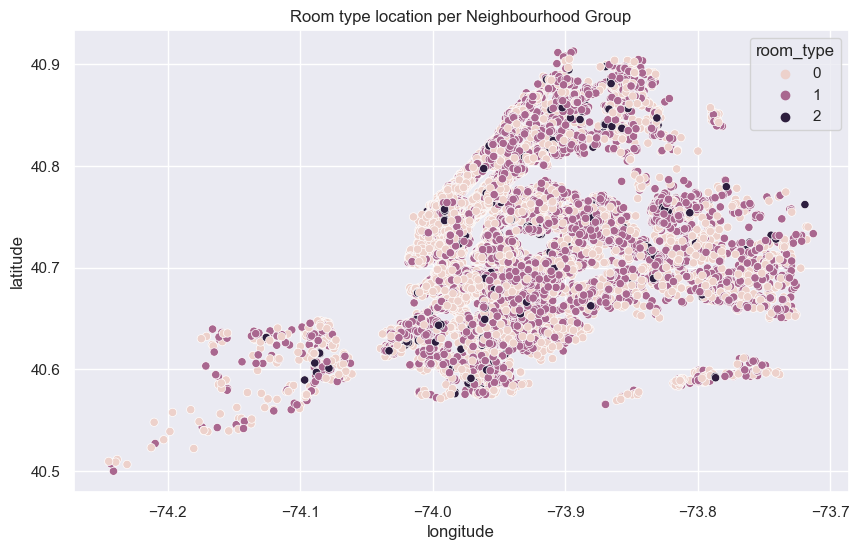

In [45]:
title = 'Neighbourbood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data= dff).set_title(title)

plt.ioff()

title = 'Room type location per Neighbourhood Group'

plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=dff).set_title(title)
plt.ioff()


## Geographical Distribution of Prices 

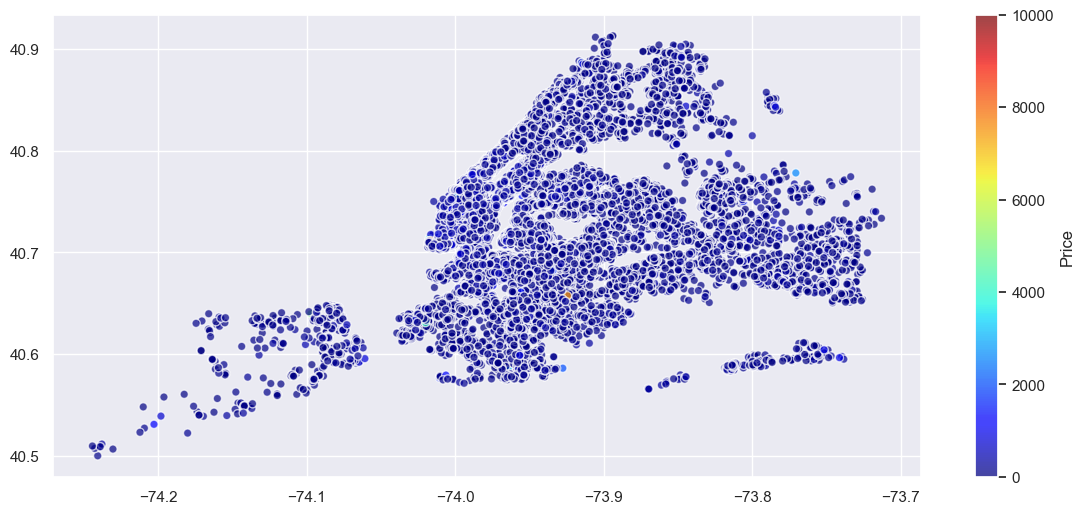

In [46]:
plt.figure(figsize=(14,6))
plt.scatter(dff.longitude, dff.latitude, c=dff.price, alpha=0.7
           ,cmap='jet', edgecolors='white')
cbar = plt.colorbar()
cbar.set_label('Price')
plt.show()

## Geographical Distribution of Availability

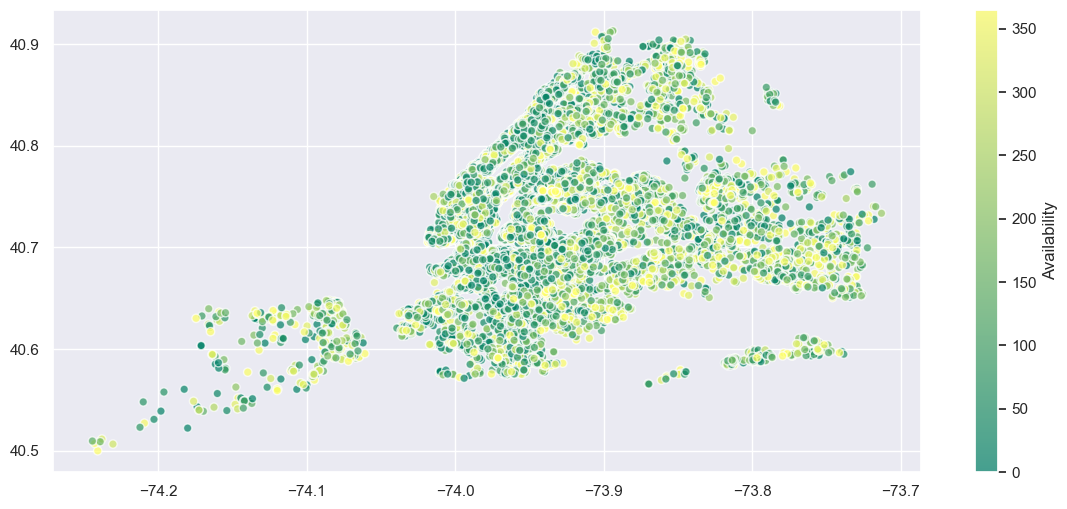

In [47]:
plt.figure(figsize= (14,6))
plt.scatter(dff.longitude, dff.latitude, c = dff.availability_365, alpha = 0.7,cmap ='summer',edgecolor = 'white')
c_bar = plt.colorbar()
c_bar.set_label('Availability')
plt.show()

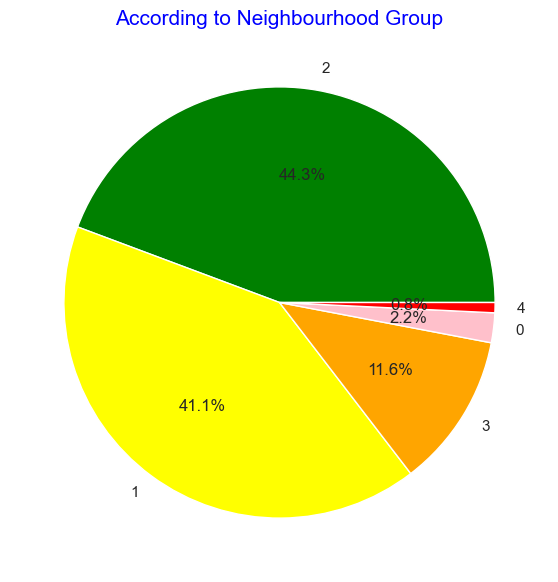

In [48]:
labels = dff.neighbourhood_group.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = dff.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('According to Neighbourhood Group',color = 'blue',fontsize = 15)
plt.show()

## Price Distribution by Room Type in Neighbourhood Groups 

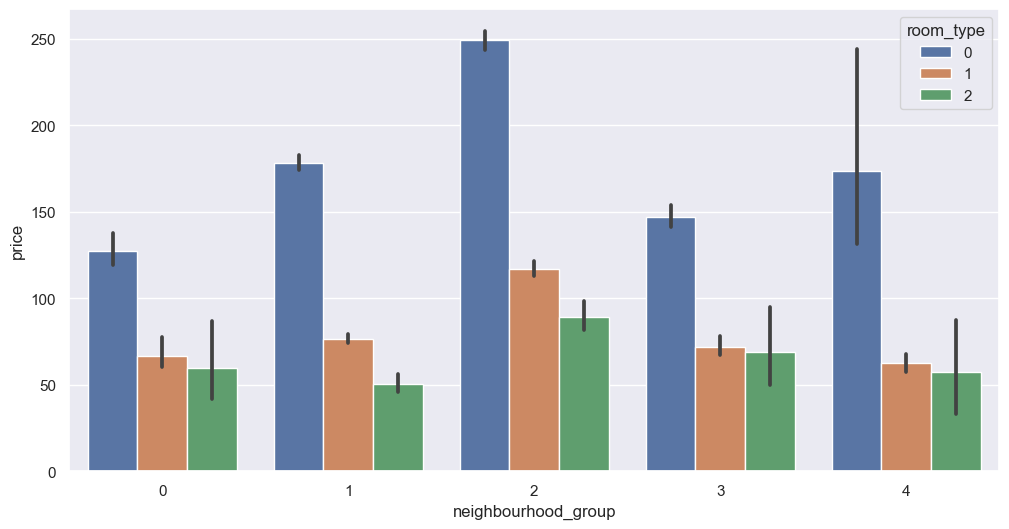

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = dff)
plt.xticks(rotation=0)
plt.show()

## Comaparision of Minimum Stay Nights By NeighbourHood Group

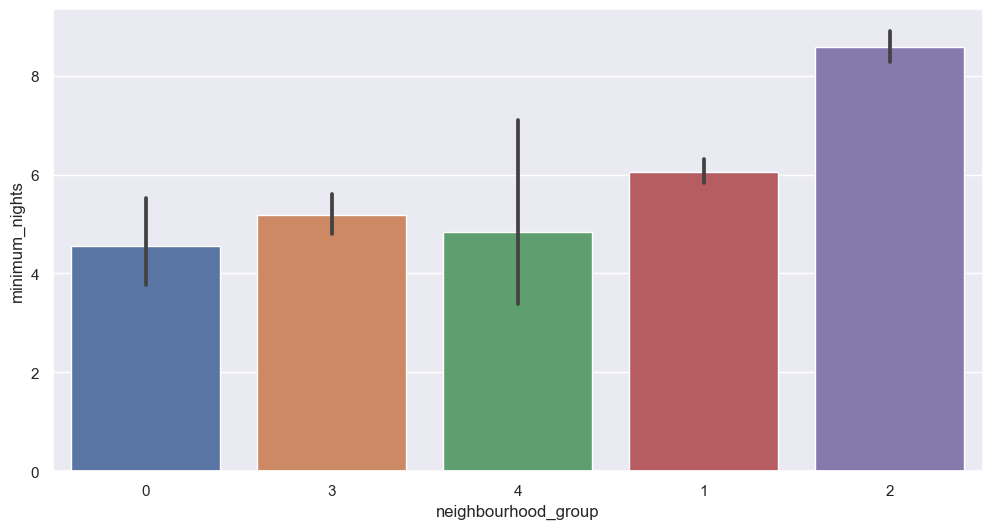

In [50]:
plt.figure(figsize=(12,6))

result = dff.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')

sns.barplot(x='neighbourhood_group', y="minimum_nights", data=dff, order=result['neighbourhood_group'])

plt.show()

## Outliers Analysis

### Analysis using Boxplot

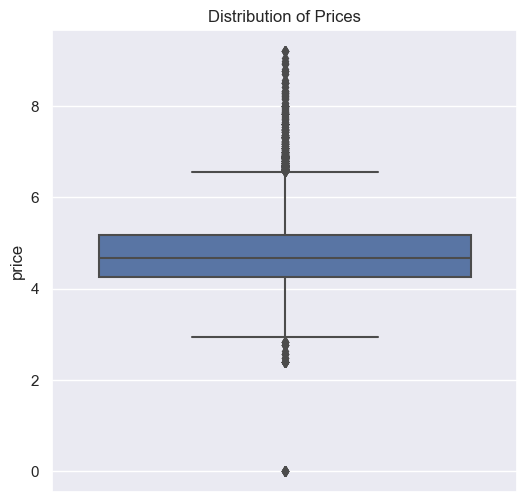

In [56]:
plt.figure(figsize=(6,6))
sns.boxplot(y=np.log1p(dff['price']))
plt.title("Distribution of Prices")
plt.show()


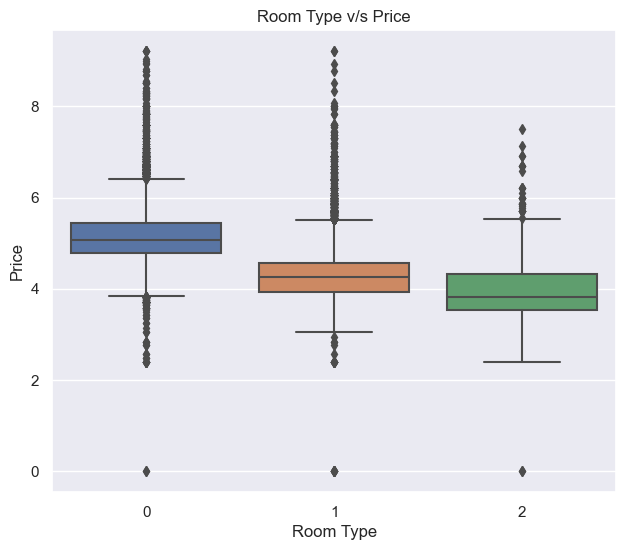

In [59]:
fig = plt.figure(figsize=(16,6))

fig.add_subplot(1,2,1)

p1 = sns.boxplot(x = dff['room_type'], y=np.log1p(dff['price']))

p1.set_title("Room Type v/s Price")
p1.set_xlabel("Room Type")
p1.set_ylabel("Price")

plt.show()

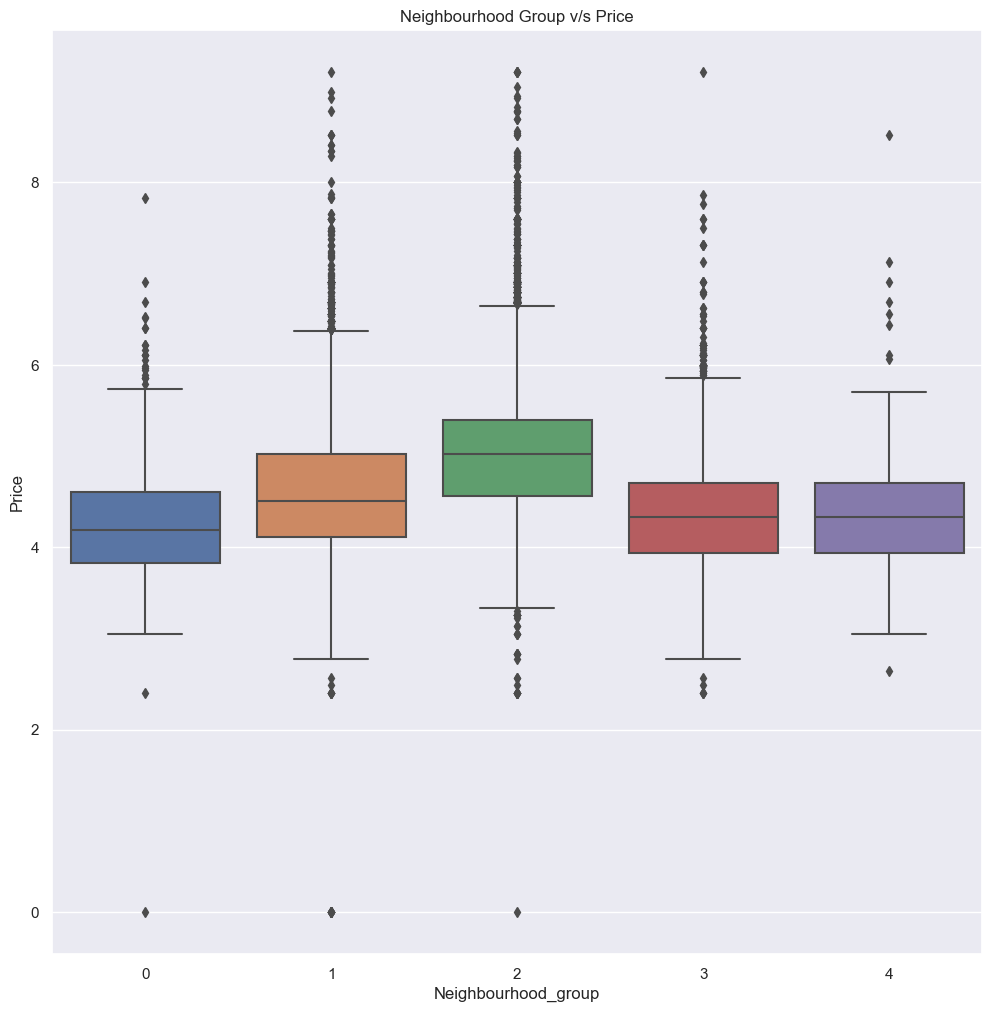

In [60]:
fig.add_subplot(1,2,2)
p2 = sns.boxplot(x = dff['neighbourhood_group'], y = np.log1p(dff['price']))

p2.set_title("Neighbourhood Group v/s Price")
p2.set_xlabel("Neighbourhood_group")
p2.set_ylabel("Price")

plt.show()

In [61]:
dff.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365,5.010635
1,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355,5.420535
2,2,94,40.80902,-73.94190,1,150,3,0,1.373221,1,365,5.017280
3,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194,4.499810
4,2,61,40.79851,-73.94399,0,80,10,9,0.100000,1,0,4.394449


In [65]:
def outlier_thresholds(dataframe , col_name , q1= 0.05, q3= 0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    
    return low_limit, up_limit

In [84]:

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    count = 0
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        count += 1
        return True
    else:
        return False
     

In [85]:
for col in num_cols:
    print(col, check_outlier(dff, col))

neighbourhood False
latitude False
longitude True
price True
minimum_nights True
number_of_reviews True
reviews_per_month True
calculated_host_listings_count True
availability_365 False
price_log True


In [87]:
df2 = dff.copy()

In [86]:
## Fixing the outliers 

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [88]:
for col in num_cols:
    if check_outlier(dff, col):
        replace_with_thresholds(dff, col)

In [89]:
for col in num_cols:
    print(col, check_outlier(dff, col))

neighbourhood False
latitude False
longitude False
price False
minimum_nights False
number_of_reviews False
reviews_per_month False
calculated_host_listings_count False
availability_365 False
price_log False


all the outliers are now under the quantile range 

In [93]:
# This feature represents the total cost of the house for the minimum number of nights. It takes the total of the price for minimum nights.
dff['NEW_total_cost'] = dff['price'] * dff['minimum_nights']

# This feature can be used to estimate for how long a house has been listed. This duration is calculated by dividing the total number of reviews that the house has received by the number of reviews per month.
dff['NEW_estimated_listed_months'] = dff['number_of_reviews'] / dff['reviews_per_month']

# This feature gives the ratio of how long a house is available throughout the year.
dff['NEW_availability_ratio'] = dff['availability_365'] / 365

# This feature gives the daily average reviews a host receives. It divides the reviews per month by the number of days in a month.
dff['NEW_daily_average_reviews'] = dff['reviews_per_month'] / 30

# This feature estimates how much a host can earn in a year. It multiplies the price of a house with how many days it is available in a year.
dff['NEW_annual_income'] = dff['price'] * dff['availability_365']

# This feature estimates the average duration a customer stays. It divides the total number of reviews by the reviews per month.
dff['NEW_average_stay_duration'] = dff['number_of_reviews'] / dff['reviews_per_month']

# This feature gives the occupancy rate of a house throughout the year. It subtracts from 365 the number of days a house is available in a year.
dff['NEW_house_occupancy_rate'] = 365 - dff['availability_365']

# This feature determines the minimum amount a house can get for a booking. It multiplies the price of a house with the minimum nights.
dff['NEW_minimum_income'] = dff['price'] * dff['minimum_nights']


In [94]:
dff.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,NEW_total_cost,NEW_estimated_listed_months,NEW_availability_ratio,NEW_daily_average_reviews,NEW_annual_income,NEW_average_stay_duration,NEW_house_occupancy_rate,NEW_minimum_income
0,1,108,40.64749,-73.97237,1,149.0,1.0,9,0.210000,6,365,5.010635,149.0,42.857143,1.000000,0.007000,54385.0,42.857143,0,149.0
1,2,127,40.75362,-73.98377,0,225.0,1.0,45,0.380000,2,355,5.420535,225.0,118.421053,0.972603,0.012667,79875.0,118.421053,10,225.0
2,2,94,40.80902,-73.94190,1,150.0,3.0,0,1.373221,1,365,5.017280,450.0,0.000000,1.000000,0.045774,54750.0,0.000000,0,450.0
3,1,41,40.68514,-73.95976,0,89.0,1.0,270,4.640000,1,194,4.499810,89.0,58.189655,0.531507,0.154667,17266.0,58.189655,171,89.0
4,2,61,40.79851,-73.94399,0,80.0,10.0,9,0.100000,1,0,4.394449,800.0,90.000000,0.000000,0.003333,0.0,90.000000,365,800.0


## Encoding 

In [95]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  float64
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  price_log                       48895 non-null  float64
 12  NEW_total_cost                  

In [97]:
cat_cols, num_cols, cat_but_car,  num_but_cat = col_names(dff)

Observations: 48895
Variables: 20
cat_cols: 2
num_cols: 18
cat_but_car: 0
num_but_cat: 2


In [98]:
num_cols

['neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'price_log',
 'NEW_total_cost',
 'NEW_estimated_listed_months',
 'NEW_availability_ratio',
 'NEW_daily_average_reviews',
 'NEW_annual_income',
 'NEW_average_stay_duration',
 'NEW_house_occupancy_rate',
 'NEW_minimum_income']

In [99]:
cat_but_car

[]

In [100]:
cat_cols

['neighbourhood_group', 'room_type']

In [101]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [102]:
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [103]:
dff.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,...,NEW_annual_income,NEW_average_stay_duration,NEW_house_occupancy_rate,NEW_minimum_income,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,room_type_1,room_type_2
0,108,40.64749,-73.97237,149.0,1.0,9,0.210000,6,365,5.010635,...,54385.0,42.857143,0,149.0,True,False,False,False,True,False
1,127,40.75362,-73.98377,225.0,1.0,45,0.380000,2,355,5.420535,...,79875.0,118.421053,10,225.0,False,True,False,False,False,False
2,94,40.80902,-73.94190,150.0,3.0,0,1.373221,1,365,5.017280,...,54750.0,0.000000,0,450.0,False,True,False,False,True,False
3,41,40.68514,-73.95976,89.0,1.0,270,4.640000,1,194,4.499810,...,17266.0,58.189655,171,89.0,True,False,False,False,False,False
4,61,40.79851,-73.94399,80.0,10.0,9,0.100000,1,0,4.394449,...,0.0,90.000000,365,800.0,False,True,False,False,False,False


## Standardization Process 

In [104]:
num_cols = [col for col in num_cols if col not in ['price']]

In [106]:
num_cols

['neighbourhood',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'price_log',
 'NEW_total_cost',
 'NEW_estimated_listed_months',
 'NEW_availability_ratio',
 'NEW_daily_average_reviews',
 'NEW_annual_income',
 'NEW_average_stay_duration',
 'NEW_house_occupancy_rate',
 'NEW_minimum_income']

In [105]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [107]:
dff[num_cols] = scaler.fit_transform(dff[num_cols])

In [108]:
dff.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,...,NEW_annual_income,NEW_average_stay_duration,NEW_house_occupancy_rate,NEW_minimum_income,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,room_type_1,room_type_2
0,0.110236,-1.035130,-0.356662,149.0,-0.50,0.173913,-0.776923,5.0,1.409692,0.366389,...,2.226311,0.819125,-1.409692,-0.251877,True,False,False,False,True,False
1,0.259843,0.418407,-0.600278,225.0,-0.50,1.739130,-0.646154,1.0,1.365639,0.810971,...,3.359200,3.017828,-1.365639,-0.125104,False,True,False,False,False,False
2,0.000000,1.177155,0.294476,150.0,0.00,-0.217391,0.117863,0.0,1.409692,0.373596,...,2.242533,-0.427901,-1.409692,0.250209,False,True,False,False,True,False
3,-0.417323,-0.519482,-0.087189,89.0,-0.50,11.521739,2.630769,0.0,0.656388,-0.187659,...,0.576578,1.265259,-0.656388,-0.351960,True,False,False,False,False,False
4,-0.259843,1.033212,0.249813,80.0,1.75,0.173913,-0.861538,0.0,-0.198238,-0.301934,...,-0.190800,2.190853,0.198238,0.834028,False,True,False,False,False,False


## Creating Model 

In [109]:
y = dff['price']

In [116]:
x = dff.drop(['price', 'neighbourhood', 'price_log'], axis = 1)

In [117]:
x.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,NEW_total_cost,NEW_estimated_listed_months,NEW_availability_ratio,...,NEW_annual_income,NEW_average_stay_duration,NEW_house_occupancy_rate,NEW_minimum_income,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,room_type_1,room_type_2
0,-1.035130,-0.356662,-0.50,0.173913,-0.776923,5.0,1.409692,-0.251877,0.819125,1.409692,...,2.226311,0.819125,-1.409692,-0.251877,True,False,False,False,True,False
1,0.418407,-0.600278,-0.50,1.739130,-0.646154,1.0,1.365639,-0.125104,3.017828,1.365639,...,3.359200,3.017828,-1.365639,-0.125104,False,True,False,False,False,False
2,1.177155,0.294476,0.00,-0.217391,0.117863,0.0,1.409692,0.250209,-0.427901,1.409692,...,2.242533,-0.427901,-1.409692,0.250209,False,True,False,False,True,False
3,-0.519482,-0.087189,-0.50,11.521739,2.630769,0.0,0.656388,-0.351960,1.265259,0.656388,...,0.576578,1.265259,-0.656388,-0.351960,True,False,False,False,False,False
4,1.033212,0.249813,1.75,0.173913,-0.861538,0.0,-0.198238,0.834028,2.190853,-0.198238,...,-0.190800,2.190853,0.198238,0.834028,False,True,False,False,False,False


### Splitting the data 

In [118]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [126]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ('KNN', KNeighborsRegressor()),
          ('DT', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []

for name , regressor in models:
    
    regressor.fit(x_train, y_train)
    
    # making predictions
    y_pred = regressor.predict(x_test)
    
    # calculate RMSE 
    
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, x, y, cv=5, scoring='neg_mean_squared_error')))
    rmse_scores.append(rmse)
    
    # calculate R^2 score 
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    
    # Calculate MSE 
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    
    print(f"RMSE : {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"MSE: {round(mse, 4)} ({name})")

RMSE : 71.532 (LR)
R^2 Score: 0.6523 (LR)
MAE: 42.1631 (LR)
MSE: 5051.3072 (LR)
RMSE : 71.532 (Ridge)
R^2 Score: 0.6523 (Ridge)
MAE: 42.1613 (Ridge)
MSE: 5051.308 (Ridge)
RMSE : 72.0145 (Lasso)
R^2 Score: 0.6441 (Lasso)
MAE: 42.0876 (Lasso)
MSE: 5170.9921 (Lasso)
RMSE : 44.5905 (KNN)
R^2 Score: 0.8878 (KNN)
MAE: 22.1905 (KNN)
MSE: 1629.3085 (KNN)
RMSE : 13.0419 (DT)
R^2 Score: 0.9913 (DT)
MAE: 1.2602 (DT)
MSE: 126.2256 (DT)
RMSE : 9.8276 (RF)
R^2 Score: 0.9968 (RF)
MAE: 0.9704 (RF)
MSE: 46.5153 (RF)
RMSE : 20.738 (GBM)
R^2 Score: 0.9711 (GBM)
MAE: 11.1037 (GBM)
MSE: 420.5444 (GBM)
RMSE : 8.4544 (XGBoost)
R^2 Score: 0.9956 (XGBoost)
MAE: 2.8961 (XGBoost)
MSE: 63.4224 (XGBoost)
RMSE : 5.6762 (CatBoost)
R^2 Score: 0.9986 (CatBoost)
MAE: 2.1332 (CatBoost)
MSE: 20.4996 (CatBoost)


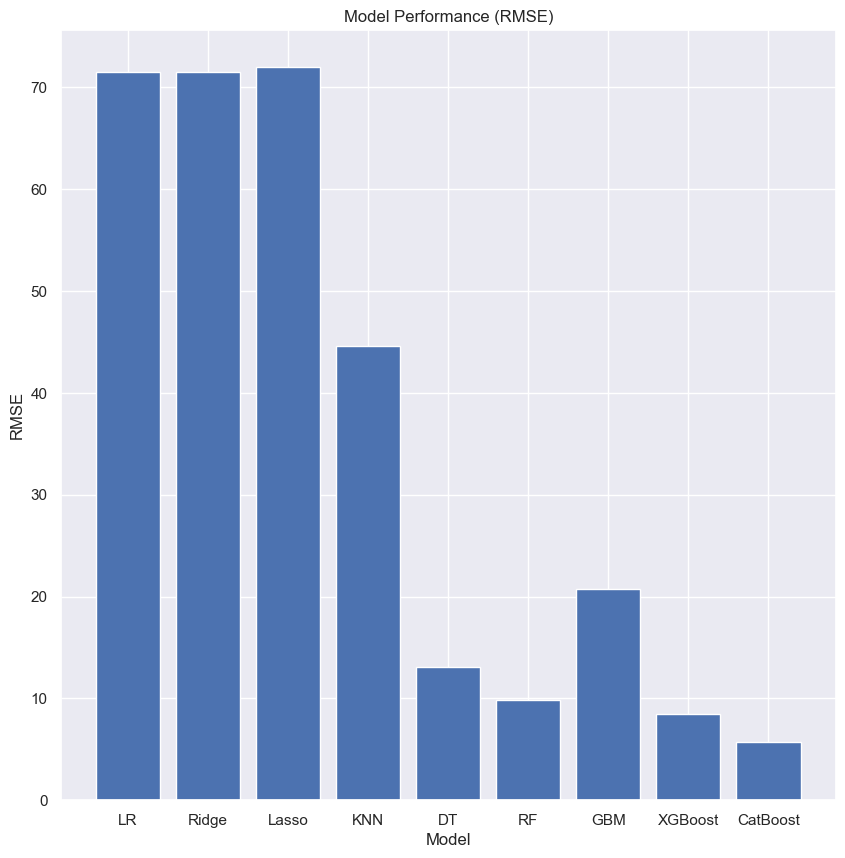

In [128]:
# Plot RMSE scores 
plt.figure(figsize = (10,10))
plt.bar([name for name, _ in models], rmse_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

## Hyperparameter Optimization 

In [129]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ('KNN', KNeighborsRegressor()),
          ('DT', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []

# Define the hyperparameters for each model
param_grids = {
    'LR': {},
    'Ridge': {'alpha': [0.1, 1.0]},
    'Lasso': {'alpha': [0.1, 1.0]},
    'KNN': {'n_neighbors': [3, 5]},
    'DT': {'max_depth': [None, 10], 'min_samples_leaf': [1, 2]},
    'RF': {'n_estimators': [10, 50], 'max_depth': [None, 10]},
    'GBM': {'n_estimators': [10, 50], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [10, 50], 'learning_rate': [0.01, 0.1]},
    'CatBoost': {'iterations': [10, 50], 'learning_rate': [0.01, 0.1], 'depth': [4, 6]}
}

# Train and evaluate the models with hyperparameter tuning 

for name , regressor in models:
    print(f"Hyperparameter Tuning for {name}:")
    
    if param_grids[name]:
        grid_search = GridSearchCV(regressor, param_grid=param_grids[name],
                                  cv=5,n_jobs=-1)
        grid_search.fit(x_train,y_train)
        
        best_model = grid_search.best_estimator_
        
        print(f"Best parameters : {grid_search.best_params_}")
        
    else:
        best_model = regressor.fit(x_train, y_train)
        
    
    # making predictions 
    y_pred = best_model.predict(x_test)
    
     # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"MSE: {round(mse, 4)} ({name})")

Hyperparameter Tuning for LR:
RMSE: 71.0725 (LR)
R^2 Score: 0.6523 (LR)
MAE: 42.1631 (LR)
MSE: 5051.3072 (LR)
Hyperparameter Tuning for Ridge:
Best parameters : {'alpha': 0.1}
RMSE: 71.0725 (Ridge)
R^2 Score: 0.6523 (Ridge)
MAE: 42.1629 (Ridge)
MSE: 5051.3071 (Ridge)
Hyperparameter Tuning for Lasso:
Best parameters : {'alpha': 0.1}
RMSE: 71.1074 (Lasso)
R^2 Score: 0.6519 (Lasso)
MAE: 42.0701 (Lasso)
MSE: 5056.2644 (Lasso)
Hyperparameter Tuning for KNN:
Best parameters : {'n_neighbors': 3}
RMSE: 40.3448 (KNN)
R^2 Score: 0.888 (KNN)
MAE: 22.4463 (KNN)
MSE: 1627.7 (KNN)
Hyperparameter Tuning for DT:
Best parameters : {'max_depth': None, 'min_samples_leaf': 2}
RMSE: 10.2328 (DT)
R^2 Score: 0.9928 (DT)
MAE: 1.3299 (DT)
MSE: 104.7106 (DT)
Hyperparameter Tuning for RF:
Best parameters : {'max_depth': None, 'n_estimators': 50}
RMSE: 6.2461 (RF)
R^2 Score: 0.9973 (RF)
MAE: 0.9618 (RF)
MSE: 39.0139 (RF)
Hyperparameter Tuning for GBM:
Best parameters : {'learning_rate': 0.1, 'n_estimators': 50}
R

## Final Model predictions 

In [130]:
best_model

In [131]:
final_model = best_model

# prediction on the test data 
y_final_pred = final_model.predict(x_test)
final_y_pred = y_final_pred
final_y_test = y_test


In [133]:
results = pd.DataFrame({'Predicted_Price' : final_y_pred, 'True_Price': final_y_test
                       })

results['Difference'] = results['True_Price'] - results['Predicted_Price']

results

,Predicted_Price,True_Price,Difference
879,109.272762,89.0,-20.272762
44383,33.418951,30.0,-3.418951
15394,111.728686,120.0,8.271314
43230,465.514573,470.0,4.485427
16332,175.551848,199.0,23.448152
...,...,...,...
20477,201.987508,215.0,13.012492
44969,95.237065,100.0,4.762935
36577,69.934874,70.0,0.065126
11477,411.356663,500.0,88.643337
